# Extreme Gradient Boosting with XGBoost

[More Information](https://xgboost.readthedocs.io/en/latest/)

XGBoost or eXtreme Gradient Boosting is under the boosted tree family and follows the same principles of gradient boosting machine (GBM).  The key differences include:

- Regularised to prevent overfitting, giving more accurate results.
- A sparse matrix data structure, giving more efficient cache utilisation and processing speed.

![](https://pvsmt99345.i.lithium.com/t5/image/serverpage/image-id/61047iF5F5072316647A42/image-size/large?v=1.0&px=999)

XGBoost is an optimized distributed gradient boosting library designed to be highly **efficient**, **flexible** and **portable**. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.

More about XGBoost:

- Originally written in C++
- Has APIs in several languages:
  - Python
  - R
  - Scala
  - Julia
  - Java
- Features can be either numerical or categorical
- Numerical features should be scaled (Z-scored)
- Categorical features should be encoded (one-hot)

To install:
```shell
pip install xgboost
```

Get started with XGBoost:
```python
import xgboost as xgb
# read in data
dtrain = xgb.DMatrix('demo/data/agaricus.txt.train')
dtest = xgb.DMatrix('demo/data/agaricus.txt.test')
# specify parameters via map
param = {'max_depth':2, 'eta':1, 'objective':'binary:logistic' }
num_round = 2
bst = xgb.train(param, dtrain, num_round)
# make prediction
preds = bst.predict(dtest)
```

## To remember:

**Elements of Supervised Learning**
- Model and Parameters
  - The **model** in a supervised learning usually refers to the mathematical structure of by which the prediction $y_i$ is made from the input $x_i$.  For example in a *linear model*, where prediction is given as $\hat{y_i} = \sum_j{\theta_jx_{ij}}$, a linear combination of weighted input features.  
  - The **parameters** are the undetermined part that we need to learn from data.  In linear regression problems, the parameters are the coefficients $\theta$.
- Objetive Function: Training Loss + Regularization
  - The task of **training** the model amounts to finding the best parameters $\theta$ that best fit the training data $x_i$ and labels $y_i$.  In order to train the model, we need to define the **objective function** to measure how well the model fit the training data. $$obj(\theta)=L(\theta) + \Omega(\theta)$$
  where $L$ is the training loss function, and $\Omega$ is the regularization term. The training loss measures how *predictive* our model is with respect to the training data. A common choice of $L$ is the *mean squared error*, which is given by $$L(\theta)=\sum{(y_i-\hat{y_i})^2}$$
  The **regularization term** is what people usually forget to add. The regularization term controls the complexity of the model, which helps us to avoid overfitting. This sounds a bit abstract, so let us consider the following problem in the following picture. You are asked to fit visually a step function given the input data points on the upper left corner of the image. Which solution among the three do you think is the best fit?
  ![](https://raw.githubusercontent.com/dmlc/web-data/master/xgboost/model/step_fit.png)
  The correct answer is marked in red. Please consider if this visually seems a reasonable fit to you. The general principle is we want both a *simple* and *predictive* model. The tradeoff between the two is also referred as **bias-variance tradeoff** in machine learning.


## Configuring XGBoost

- **Define the problem & evaluation**:
  - *Objective / Learning Task*
    * Linear regression (reg:linear)
    * Logistic regression for binary classification (binary:logistic)
    * Softmax for multi-class classification (multi:softprob)
  - *Evaluation Metrics*:
    - AUC - Area under curve (used in classification)
    - RMSE - Root mean square error (used in regression)
    - merror - Exact matching error, (used in multi-class classification)
- **Parameters to control over fitting**:
  - *Learning rate or eta*  [default=0.3][range:(0-1)]
    * Makes the model more robust by shrinking the weights on each step.
    * Lower eta leads to slower computation, higher eta rate avoid over-fitting but less accurate result
    * If time allows and model performance is key, decrease incrementally the eta rate while increasing the no. of rounds
    * Optimal values lie between 0.01 - 0.3
  - *Max_depth* [default=6][range:(0,Inf)]
    * It controls the depth of the tree.
    * Larger the depth, more complex the model; higher chances of overfitting.
    * There is no standard value for max_depth. Larger data sets require deep trees to learn the rules from data.
- **Parameters for speed**
  - *No of rounds/tree*: [default=10][range:(1,Inf)]
    * It controls the maximum number of iterations
    * For classification, it is similar to the number of trees to grow
  - *Sub-sample* [default=1][range:(0,1)]
    * It controls the number of samples (observations) supplied to a tree.
    * Typically, its values lie between (0.5-0.8)
  - *Early Stopping*:
    * If NULL, the early stopping function is not triggered.
    * If set to an integer k, training with a validation set will stop if the performance doesn’t improve for k rounds.

Example:
```python
xgb_model = xgboost.XGBClassifier()

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(10, 100), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=2, return_train_score=True)

search.fit(X_train, y_train)

report_best_scores(search.cv_results_, 1)
```

More Information:
- [Oficial page](https://xgboost.readthedocs.io/en/latest/parameter.html)
- [XGBoost in Alteryx](https://www.abiqos.com/2019/08/expand-your-predictive-palette-xgboost-in-alteryx/)
- [Complete Guide to Parameter Tuning in XGBoost with codes in Python](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/)

# Rossmann Store Sales

Forecast sales using store, promotion, and competitor data

**Goal**: Explore data and predict 6 weeks of daily sales for 1,115 stores located across Germany

[Kaggle Competition](https://www.kaggle.com/c/rossmann-store-sales/overview)



**Prerequisites**:

[Forecasting at scale - fbprophet](https://facebook.github.io/prophet/)
```
conda install -c conda-forge fbprophet xgboost
```

In [16]:
#conda install -c conda-forge fbprophet xgboost

In [10]:
import warnings
warnings.filterwarnings("ignore")

# loading packages
# basic + dates 
import numpy as np
import pandas as pd
from pandas import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# prophet by Facebook
from fbprophet import Prophet

# machine learning: XGB
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from xgboost.sklearn import XGBRegressor # wrapper

In [11]:
# importing train data to learn
train = pd.read_csv("Data/train.csv", 
                    parse_dates = True, low_memory = False, index_col = 'Date')

# additional store data
store = pd.read_csv("Data/store.csv", 
                    low_memory = False)
# time series as indexes
train.index

DatetimeIndex(['2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31',
               ...
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01'],
              dtype='datetime64[ns]', name='Date', length=1017209, freq=None)

## Exploratory Data Analysis

In this first section we go through the train and store data, handle missing values and create new features for further analysis.

In [12]:
# first glance at the train set: head and tail
print("In total: ", train.shape)
train.head(5).append(train.tail(5))

In total:  (1017209, 8)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1
2013-01-01,1111,2,0,0,0,0,a,1
2013-01-01,1112,2,0,0,0,0,a,1
2013-01-01,1113,2,0,0,0,0,a,1
2013-01-01,1114,2,0,0,0,0,a,1


Short description:

- Sales: the turnover for any given day (target variable).
- Customers: the number of customers on a given day.
- Open: an indicator for whether the store was open: 0 = closed, 1 = open.
- Promo: indicates whether a store is running a promo on that day.
- StateHoliday: indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays.
- SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools.

We are dealing with time series data so it will probably serve us to extract dates for further analysis. We also have two likely correlated vaiables in the dataset, which can be combined into a new feature.

In [13]:
# data extraction
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.weekofyear

# adding new variable
train['SalePerCustomer'] = train['Sales']/train['Customers']
train['SalePerCustomer'].describe()

count    844340.000000
mean          9.493619
std           2.197494
min           0.000000
25%           7.895563
50%           9.250000
75%          10.899729
max          64.957854
Name: SalePerCustomer, dtype: float64

On average customers spend about 9.50$ per day. Though there are days with Sales equal to zero.

## ECDF: empirical cumulative distribution function

To get the first impression about continious variables in the data we can plot ECDF.

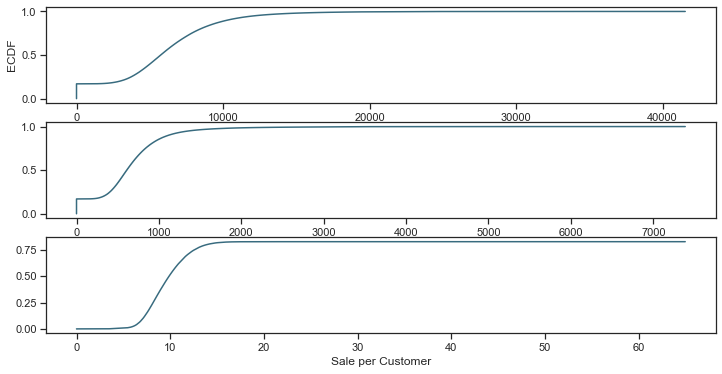

In [14]:
sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 6))

plt.subplot(311)
cdf = ECDF(train['Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Sales'); plt.ylabel('ECDF');

# plot second ECDF  
plt.subplot(312)
cdf = ECDF(train['Customers'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Customers');

# plot second ECDF  
plt.subplot(313)
cdf = ECDF(train['SalePerCustomer'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Sale per Customer');

About 20% of data has zero amount of sales/customers that we need to deal with and almost 80% of time daily amount of sales was less than 1000. So what about zero sales, is it only due to the fact that the store is closed?

## Missing values

**Closed stores and zero sales stores**

In [20]:
# closed stores
print("In total: ", train[(train.Open == 0) & (train.Sales == 0)].shape[0])
train[(train.Open == 0) & (train.Sales == 0)].head()

In total:  172817


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
Date,,,,,,,,,,,,,
2015-07-31,292,5,0,0,0,1,0,1,2015,7,31,31,NaN
2015-07-31,876,5,0,0,0,1,0,1,2015,7,31,31,NaN
2015-07-30,292,4,0,0,0,1,0,1,2015,7,30,31,NaN
2015-07-30,876,4,0,0,0,1,0,1,2015,7,30,31,NaN
2015-07-29,292,3,0,0,0,1,0,1,2015,7,29,31,NaN


There're 172817 closed stores in the data. It is about 10% of the total amount of observations. To avoid any biased forecasts we will drop these values.
What about opened stores with zero sales?

In [21]:
# opened stores with zero sales
zero_sales = train[(train.Open != 0) & (train.Sales == 0)]
print("In total: ", zero_sales.shape)
zero_sales.head(5)

In total:  (54, 13)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
Date,,,,,,,,,,,,,
2015-05-15,971,5,0,0,1,0,0,1,2015,5,15,20,NaN
2015-03-26,674,4,0,0,1,0,0,0,2015,3,26,13,NaN
2015-02-05,699,4,0,0,1,1,0,0,2015,2,5,6,NaN
2014-10-01,708,3,0,0,1,1,0,0,2014,10,1,40,NaN
2014-09-22,357,1,0,0,1,0,0,0,2014,9,22,39,NaN


Interestingly enough, there are opened store with **no sales on working days**. There're only 54 days in the data, so we can assume that there were external factors involved, for example manifestations.

In [22]:
print("Closed stores and days which didn't have any sales won't be counted into the forecasts.")
train = train[(train["Open"] != 0) & (train['Sales'] != 0)]

print("In total: ", train.shape)

Closed stores and days which didn't have any sales won't be counted into the forecasts.
In total:  (844338, 13)


What about store information:

In [23]:
# additional information about the stores
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


- Store: a unique Id for each store
- StoreType: differentiates between 4 different store models: a, b, c, d
- Assortment: describes an assortment level: a = basic, b = extra, c = extended
- CompetitionDistance: distance in meters to the nearest competitor store
- CompetitionOpenSince[Month/Year]: gives the approximate year and month of the time the nearest competitor was opened
- Promo2: Promo2 is a continuing a promotion for some stores: 0 = store is not participating, 1 = store is participating
- Promo2Since[Year/Week]: describes the year and calendar week when the store started participating in Promo2
- PromoInterval: describes the consecutive intervals Promo2 is started, naming the months the promotion is started. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [24]:
# missing values?
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

We have few variables with missing values that we need to deal with. Let's start with the CompetitionDistance.

In [25]:
# missing values in CompetitionDistance
store[pd.isnull(store.CompetitionDistance)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


Apperently this information is simply missing from the data. No particular pattern observed. In this case, it makes a complete sense to replace NaN with the median values (which is twice less that the average).

In [26]:
# fill NaN with a median value (skewed distribuion)
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)

Continuing further with missing data. What about Promo2SinceWeek? May it be that we observe unsusual data points?

In [27]:
# no promo = no information about the promo?
_ = store[pd.isnull(store.Promo2SinceWeek)]
_[_.Promo2 != 0].shape

(0, 10)

No, if there's no Promo2 then there's no information about it. We can replace these values by zeros. The same goes for tha variables deducted from the competition, CompetitionOpenSinceMonth and CompetitionOpenSinceYear.

In [28]:
# replace NA's by 0
store.fillna(0, inplace = True)

In [29]:
print("Joining train set with an additional store information.")

# by specifying inner join we make sure that only those observations 
# that are present in both train and store sets are merged together
train_store = pd.merge(train, store, how = 'inner', on = 'Store')

print("In total: ", train_store.shape)
train_store.head()

Joining train set with an additional store information.
In total:  (844338, 22)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,...,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,5020,546,1,1,0,1,2015,7,...,9.194139,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,4782,523,1,1,0,1,2015,7,...,9.143403,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,5011,560,1,1,0,1,2015,7,...,8.948214,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,6102,612,1,1,0,1,2015,7,...,9.970588,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


## Store types

In this section we will closely look at different levels of StoreType and how the main metric Sales is distributed among them.

In [30]:
train_store.groupby('StoreType')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,457042.0,6925.697986,3277.351589,46.0,4695.25,6285.0,8406.00,41551.0
b,15560.0,10233.380141,5155.729868,1252.0,6345.75,9130.0,13184.25,38722.0
c,112968.0,6933.126425,2896.958579,133.0,4916.00,6408.0,8349.25,31448.0
d,258768.0,6822.300064,2556.401455,538.0,5050.00,6395.0,8123.25,38037.0


StoreType B has the highest average of Sales among all others, however we have much less data for it. So let's print an overall sum of Sales and Customers to see which StoreType is the most selling and crowded one:


In [31]:
train_store.groupby('StoreType')['Customers', 'Sales'].sum()

,Customers,Sales
StoreType,,
a,363541431,3165334859
b,31465616,159231395
c,92129705,783221426
d,156904995,1765392943


Clearly stores of type A. StoreType D goes on the second place in both Sales and Customers. What about date periods? Seaborn's facet grid is the best tool for this task:

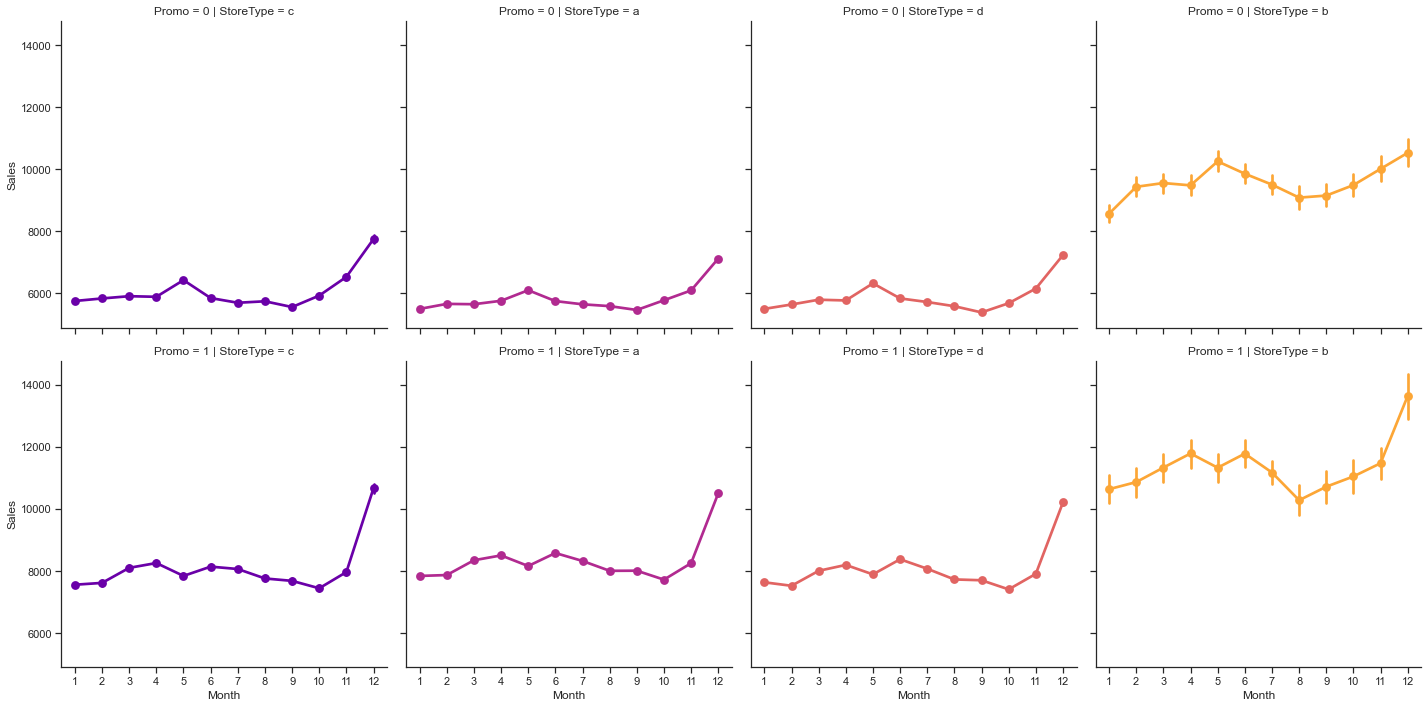

In [33]:
# sales trends
sns.factorplot(data = train_store, x = 'Month', y = "Sales", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = c)

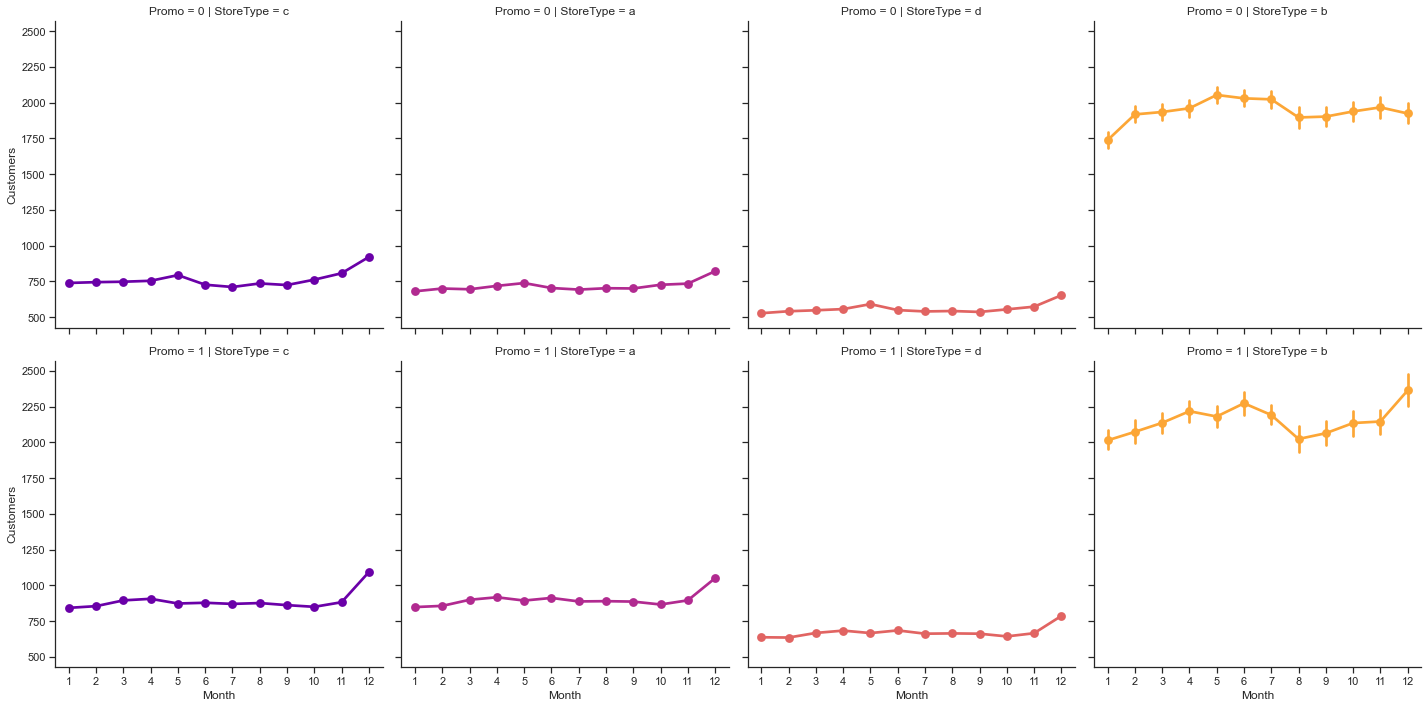

In [34]:
# sales trends
sns.factorplot(data = train_store, x = 'Month', y = "Customers", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = c)

All store types follow the same trend but at different scales depending on the presence of the (first) promotion Promo and StoreType itself (case for B).


**Already at this point, we can see that Sales escalate towards Christmas holidays. But we'll talk about seasonalities and trends later in the Time Series Analysis section.**

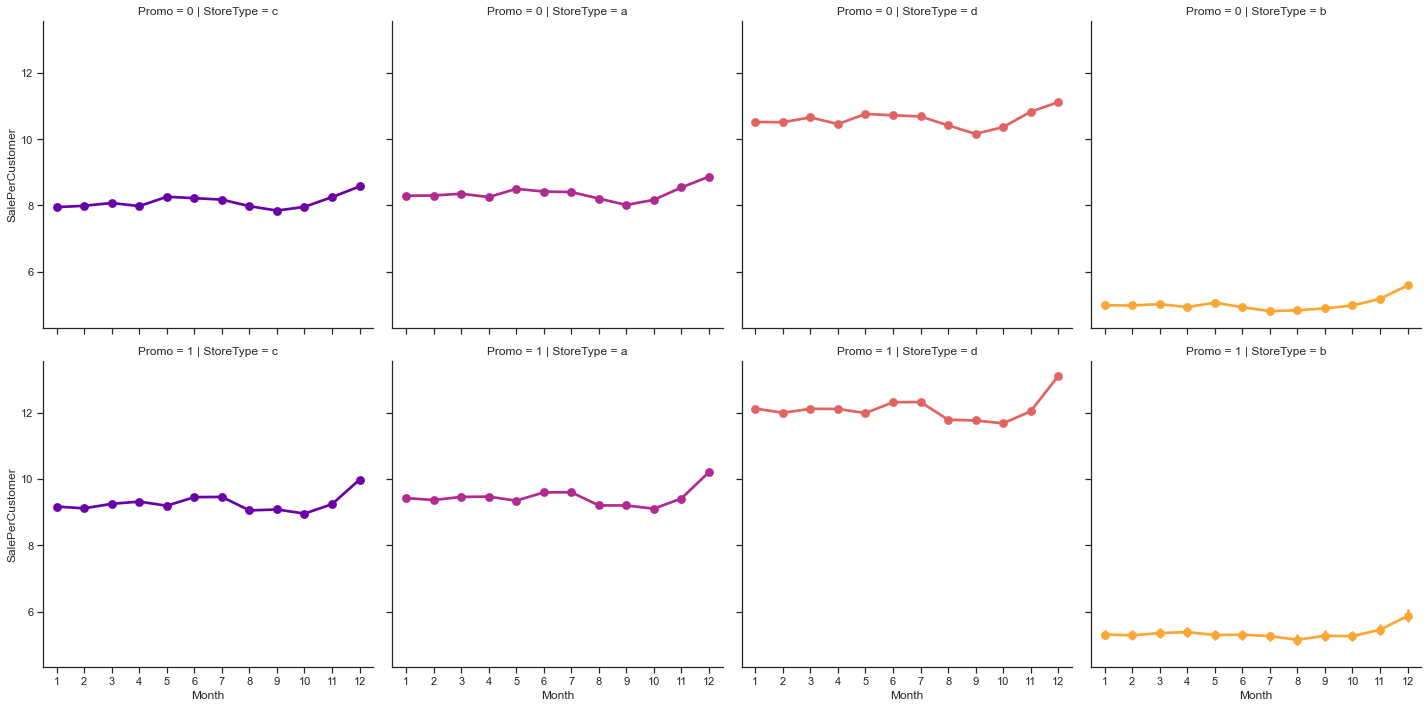

In [35]:
# sale per customer trends
sns.factorplot(data = train_store, x = 'Month', y = "SalePerCustomer", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = c)

Aha! Eventhough the plots above showed StoreType B as the most selling and performant one, in reality it is not true. The highest SalePerCustomer amount is observed at the StoreType D, about 12€ with Promo and 10€ without. As for StoreType A and C it is about 9€.

Low SalePerCustomer amount for StoreType B describes its Buyer Cart: there are a lot of people who shop essentially for "small" things (or in a little quantity). Plus we saw that overall this StoreType generated the least amount of sales and customers over the period.

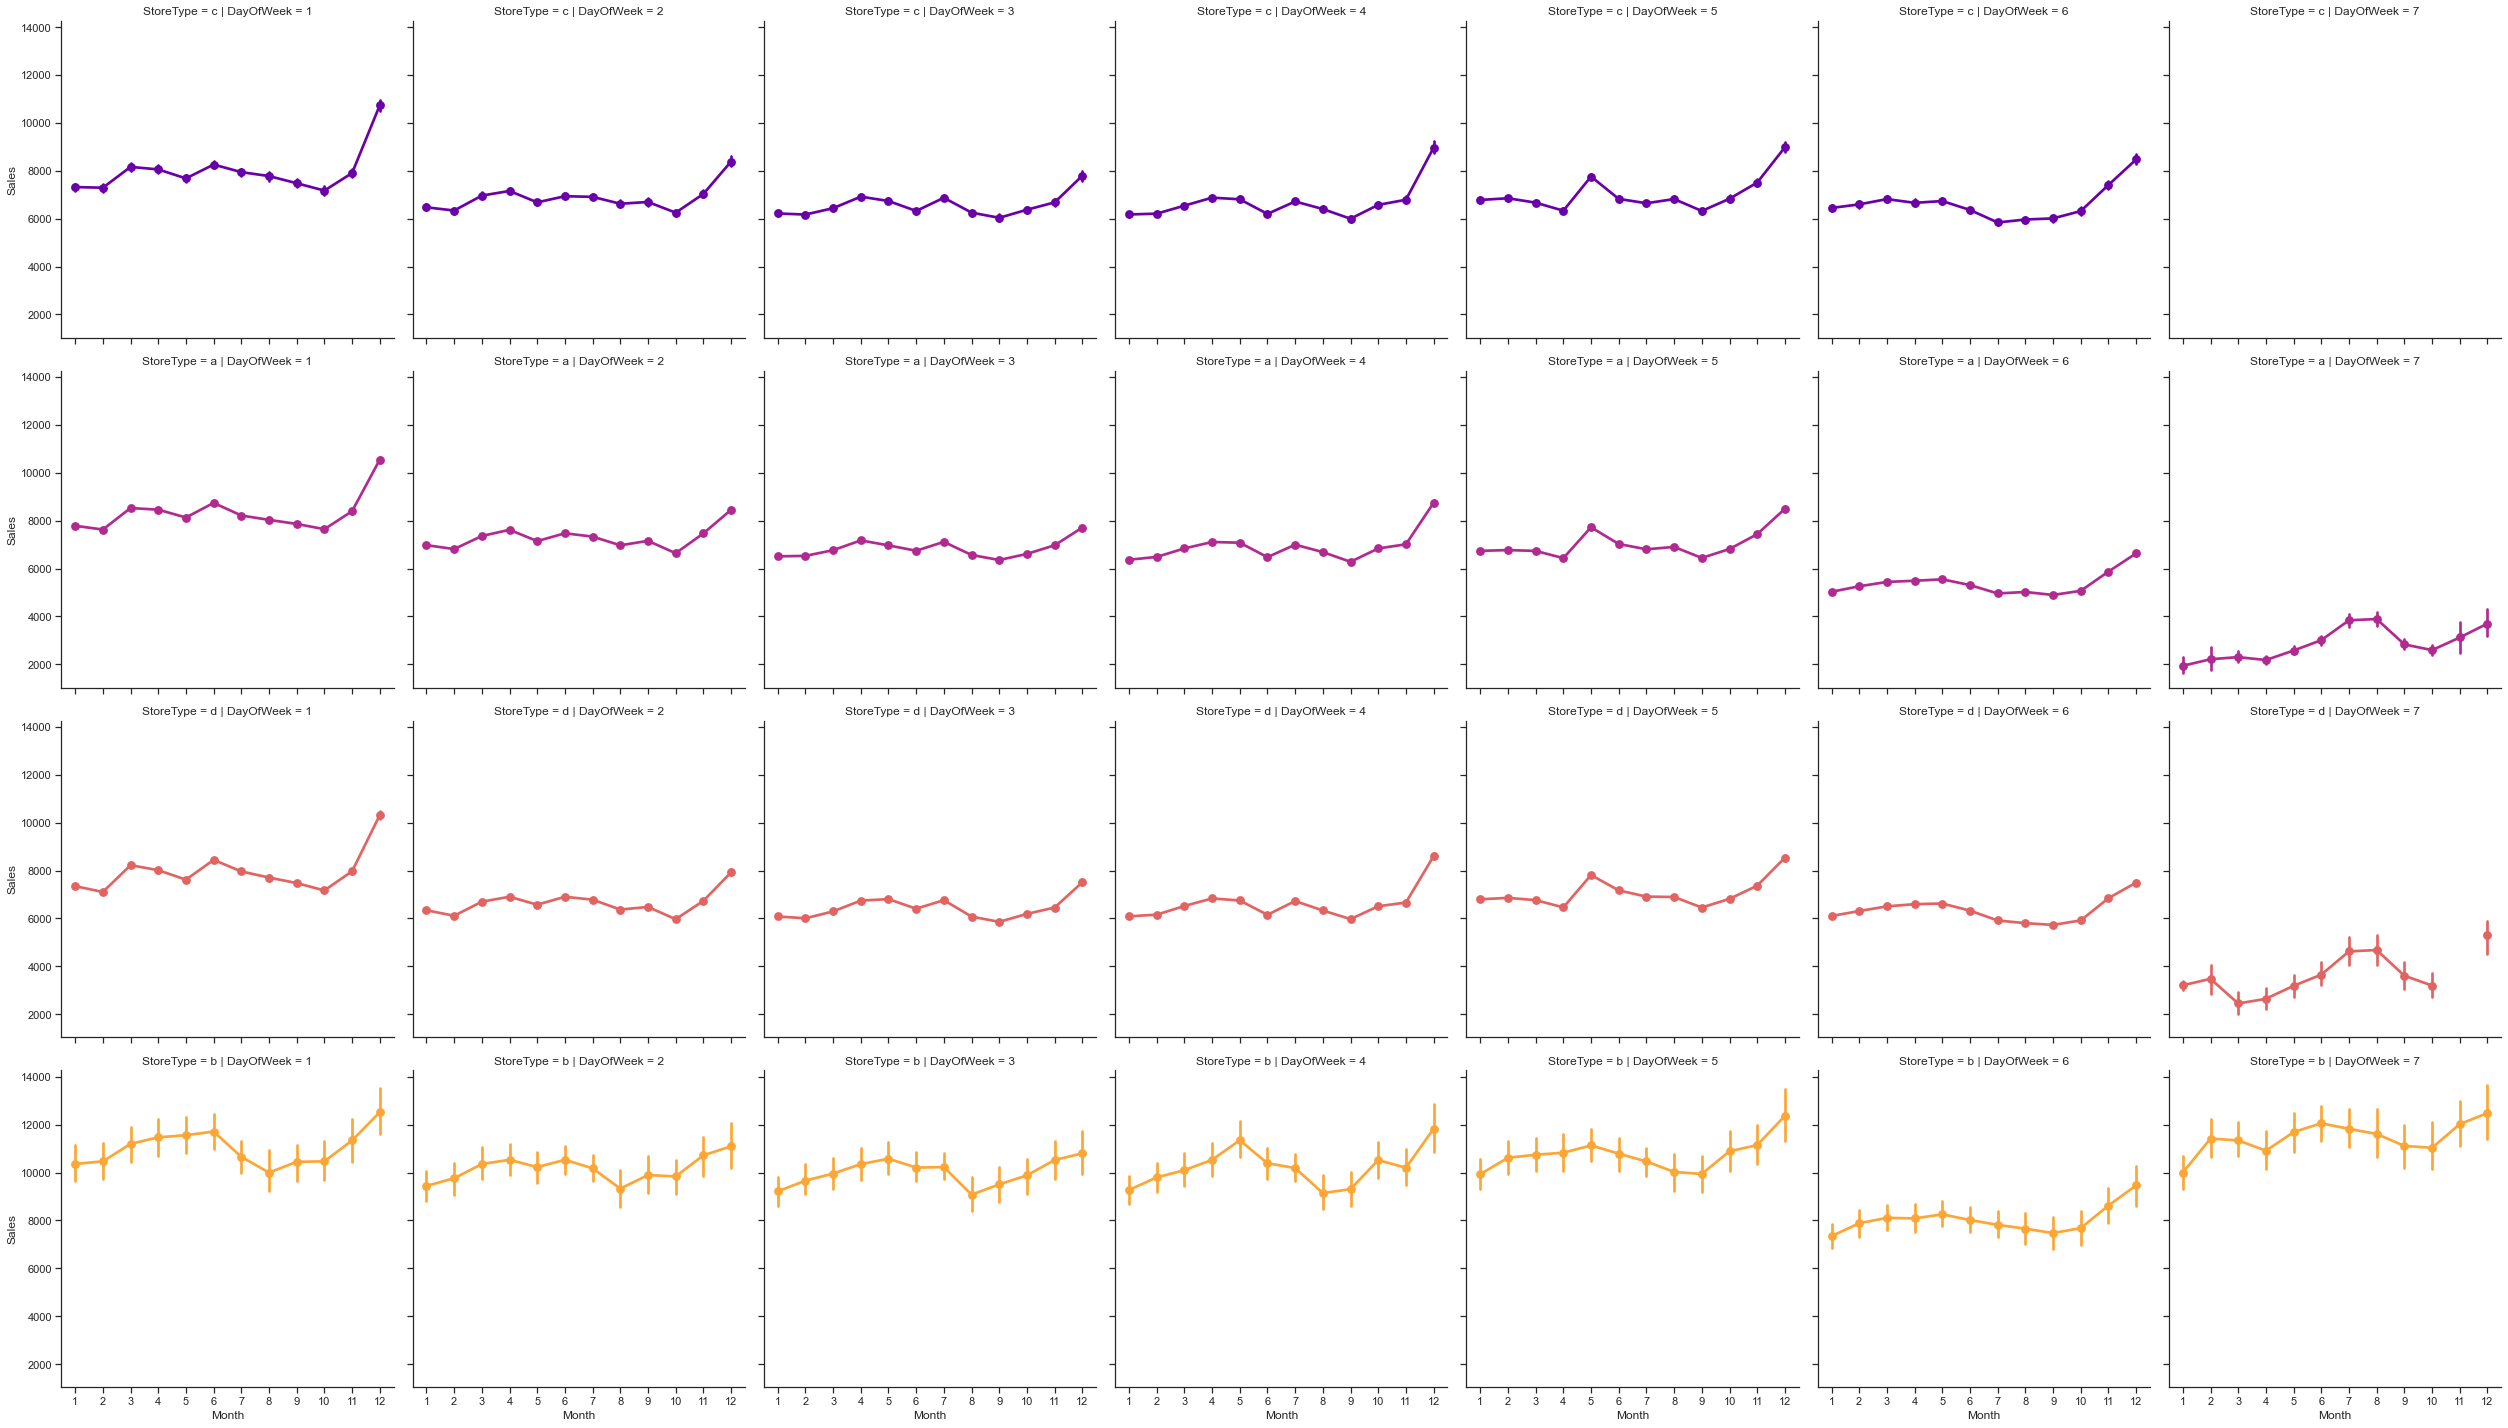

In [36]:
# customers
sns.factorplot(data = train_store, x = 'Month', y = "Sales", 
               col = 'DayOfWeek', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'StoreType', # per store type in rows
               color = c)

We see that stores of StoreType C are all closed on Sundays, whereas others are most of the time opened. Interestingly enough, stores of StoreType D are closed on Sundays only from October to December.

By the way what are the stores which are opened on Sundays?

In [37]:
# stores which are opened on Sundays
train_store[(train_store.Open == 1) & (train_store.DayOfWeek == 7)]['Store'].unique()

array([  85,  122,  209,  259,  262,  274,  299,  310,  335,  353,  423,
        433,  453,  494,  512,  524,  530,  562,  578,  676,  682,  732,
        733,  769,  863,  867,  877,  931,  948, 1045, 1081, 1097, 1099])

To complete our preliminary data analysis, we can add variables describing the period of time during which competition and promotion were opened:

In [38]:
# competition open time (in months)
train_store['CompetitionOpen'] = 12 * (train_store.Year - train_store.CompetitionOpenSinceYear) + \
        (train_store.Month - train_store.CompetitionOpenSinceMonth)
    
# Promo open time
train_store['PromoOpen'] = 12 * (train_store.Year - train_store.Promo2SinceYear) + \
        (train_store.WeekOfYear - train_store.Promo2SinceWeek) / 4.0

# replace NA's by 0
train_store.fillna(0, inplace = True)

# average PromoOpen time and CompetitionOpen time per store type
train_store.loc[:, ['StoreType', 'Sales', 'Customers', 'PromoOpen', 'CompetitionOpen']].groupby('StoreType').mean()

,Sales,Customers,PromoOpen,CompetitionOpen
StoreType,,,,
a,6925.697986,795.422370,12918.492198,7115.514452
b,10233.380141,2022.211825,17199.328069,11364.495244
c,6933.126425,815.538073,12158.636107,6745.418694
d,6822.300064,606.353935,10421.916846,9028.526526


The most selling and crowded StoreType A doesn't appear to be the one the most exposed to competitors. Instead it's a StoreType B, which also has the longest running period of promotion.

## Correlational Analysis

We are finished with adding new variables to the data, so now we can check the overall correlations by plotting the seaborn heatmap:

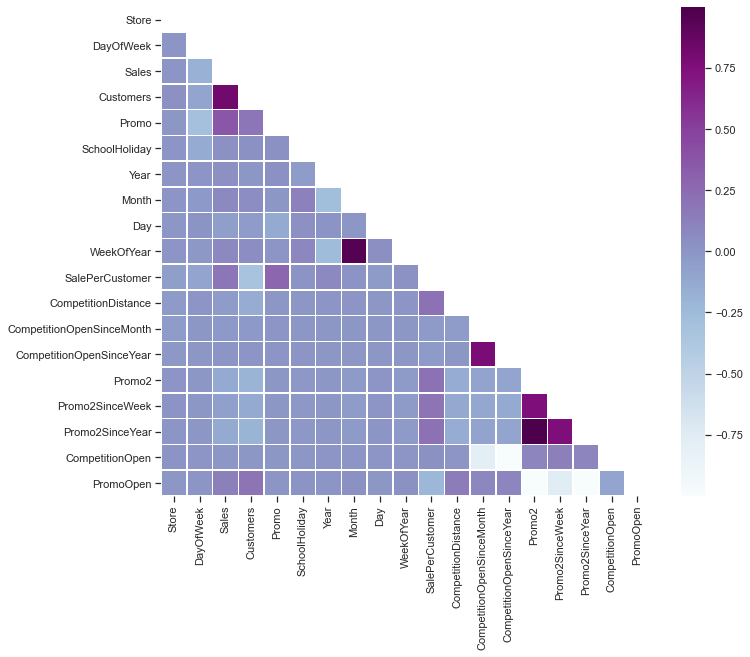

In [39]:
# Compute the correlation matrix 
# exclude 'Open' variable
corr_all = train_store.drop('Open', axis = 1).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

As mentioned before, we have a strong positive correlation between the amount of Sales and Customers of a store. We can also observe a positive correlation between the fact that the store had a running promotion (Promo equal to 1) and amount of Customers.

However, as soon as the store continues a consecutive promotion (Promo2 equal to 1) the number of Customers and Sales seems to stay the same or even decrease, which is described by the pale negative correlation on the heatmap. The same negative correlation is observed between the presence of the promotion in the store and the day of a week.

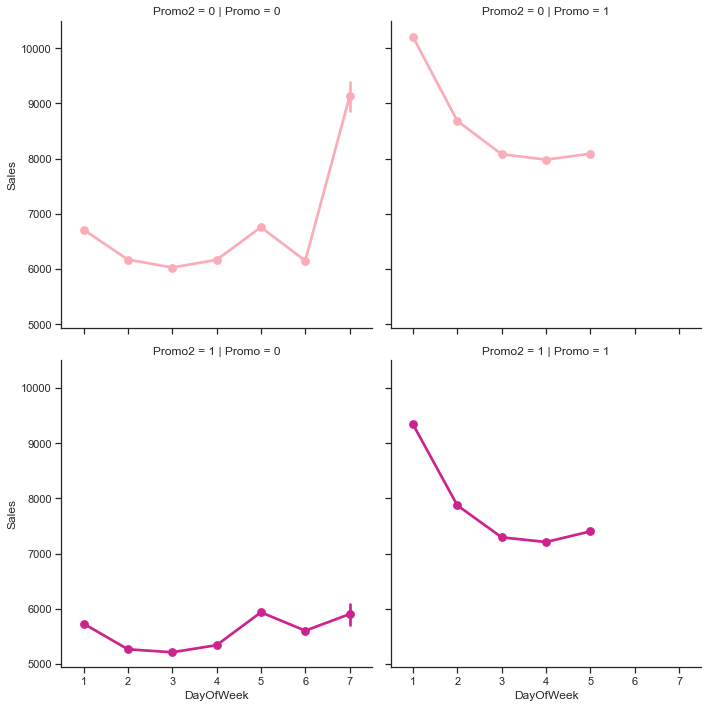

In [40]:
# sale per customer trends
sns.factorplot(data = train_store, x = 'DayOfWeek', y = "Sales", 
               col = 'Promo', 
               row = 'Promo2',
               hue = 'Promo2',
               palette = 'RdPu')

There are several things here:

- In case of no promotion, both Promo and Promo2 are equal to 0, Sales tend to peak on Sunday (!). Though we should note that StoreType C doesn't work on Sundays. So it is mainly data from StoreType A, B and D.
- On the contrary, stores that run the promotion tend to make most of the Sales on Monday. This fact could be a good indicator for Rossmann marketing campaigns. The same trend follow the stores which have both promotion at the same time (Promo and Promo2 are equal to 1).
- Promo2 alone doesn't seem to be correlated to any significant change in the Sales amount. This can be also prooved by the blue pale area on the heatmap above.

**Conclusion of EDA**

- The most selling and crowded StoreType is A.
- The best "Sale per Customer" StoreType D indicates to the higher Buyer Cart. We could also assume that the stores of this types are situated in the rural areas, so that customers prefer buying more but less often.
- Low SalePerCustomer amount for StoreType B indicates to the possible fact that people shop there essentially for small things. Which can also indicate to the label of this store type - "urban" - as it's more accessible for public, and customers don't mind shopping there from time to time during a week.
- Customers tends to buy more on Mondays when there's one promotion running (Promo) and on Sundays when there is no promotion at all (both Promo and Promo1 are equal to 0).
- Promo2 alone doesn't seem to be correlated to any significant change in the Sales amount.

## Time-Series Analysis per Store Type

What makes a time series different from a regular regression problem?
- It is time dependent. The basic assumption of a linear regression that the observations are independent doesn’t hold in this case.
- Along with an increasing or decreasing trend, most time series have some form of seasonality trends, i.e. variations specific to a particular time frame. For example, for Christmas holidays, which we will see in this dataset.

<div class = "alert alert-block alert-info"> We build a time series analysis on store types instead of individual stores. The main advantage of this approach is its simplicity of presentation and overall account for different trends and seasonaltities in the dataset. </div>

In this section, we will analyse time series data: its trends, sesonalities and autocorrelation. Usually at the end of the analysis, we are able to develop a seasonal ARIMA (Autoregression Integrated Moving Average) model but it won't be our main focus today. Instead, we try to understand the data, and only later come up with the forecasts using Prophet methodology.

### Seasonality

We take four stores from store types to represent their group:
- Store number 2 for StoreType A
- Store number 85 for StoreType B,
- Store number 1 for StoreType C
- Store number 13 for StoreType D.

It also makes sense to downsample the data from days to weeks using the resample method to see the present trends more clearly.

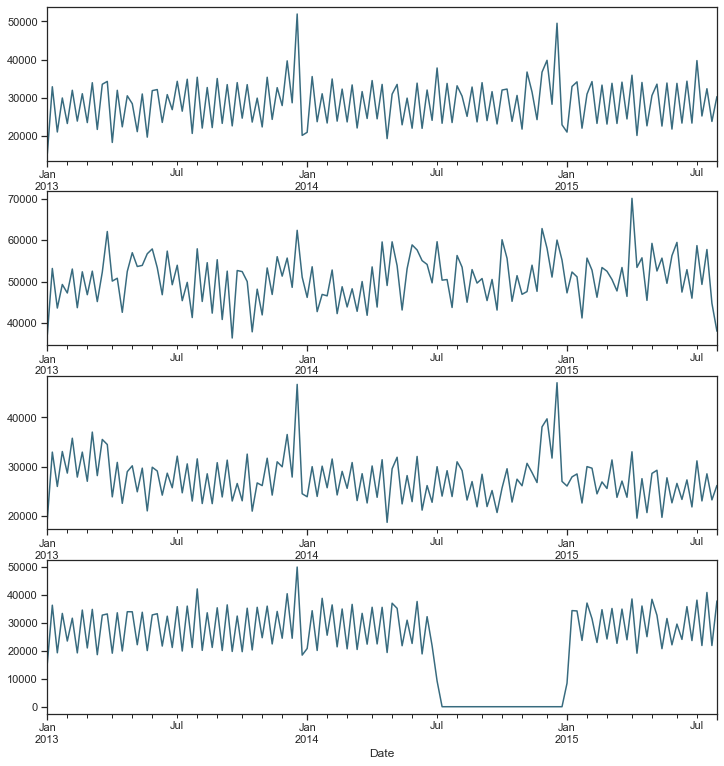

In [44]:
# preparation: input should be float type
train['Sales'] = train['Sales'] * 1.0

# store types
sales_a = train[train.Store == 2]['Sales']
sales_b = train[train.Store == 85]['Sales'].sort_index(ascending = True) # solve the reverse order
sales_c = train[train.Store == 1]['Sales']
sales_d = train[train.Store == 13]['Sales']

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (12, 13))

# store types
sales_a.resample('W').sum().plot(color = c, ax = ax1)
sales_b.resample('W').sum().plot(color = c, ax = ax2)
sales_c.resample('W').sum().plot(color = c, ax = ax3)
sales_d.resample('W').sum().plot(color = c, ax = ax4)

Retail sales for StoreType A and C tend to peak for the Christmas season and then decline after the holidays. We might have seen the same trend for StoreType D (at the bottom) but there is no information from July 2014 to January 2015 about these stores as they were closed.

### Yearly trend

The next thing to check the presence of a trend in series.

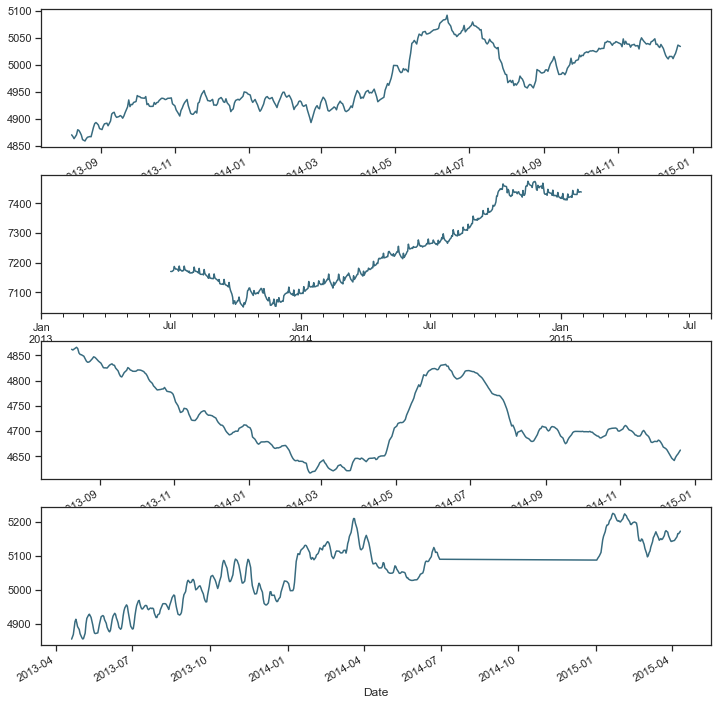

In [46]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (12, 13))

# monthly
decomposition_a = seasonal_decompose(sales_a, model = 'additive', freq = 365)
decomposition_a.trend.plot(color = c, ax = ax1)

decomposition_b = seasonal_decompose(sales_b, model = 'additive', freq = 365)
decomposition_b.trend.plot(color = c, ax = ax2)

decomposition_c = seasonal_decompose(sales_c, model = 'additive', freq = 365)
decomposition_c.trend.plot(color = c, ax = ax3)

decomposition_d = seasonal_decompose(sales_d, model = 'additive', freq = 182)
decomposition_d.trend.plot(color = c, ax = ax4)

Overall sales seems to increase, however not for the StoreType C (a third from the top). Eventhough the StoreType A is the most selling store type in the dataset, it seems that it cab follow the same decresing trajectory as StoreType C did.

## Autocorrelaion

The next step in ourtime series analysis is to review Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots.

ACF is a measure of the correlation between the timeseries with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’tn’ with series at instant ‘t1-5’…’tn-5’ (t1-5 and tn being end points).

PACF, on the other hand, measures the correlation between the timeseries with a lagged version of itself but after eliminating the variations explained by the intervening comparisons. Eg. at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

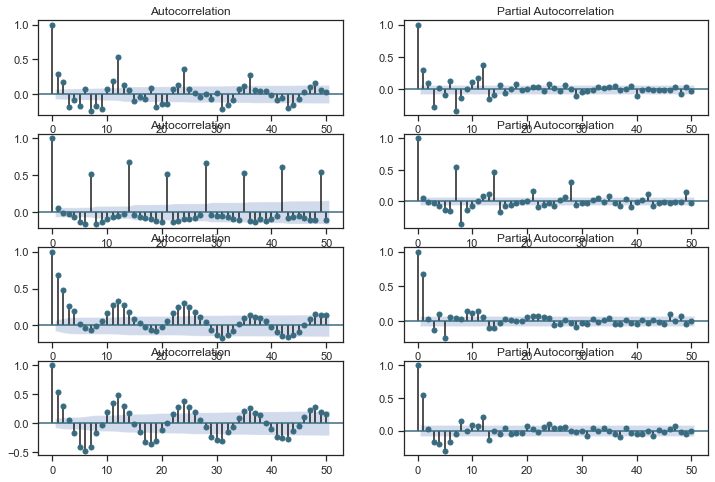

In [47]:
# figure for subplots
plt.figure(figsize = (12, 8))

# acf and pacf for A
plt.subplot(421); plot_acf(sales_a, lags = 50, ax = plt.gca(), color = c)
plt.subplot(422); plot_pacf(sales_a, lags = 50, ax = plt.gca(), color = c)

# acf and pacf for B
plt.subplot(423); plot_acf(sales_b, lags = 50, ax = plt.gca(), color = c)
plt.subplot(424); plot_pacf(sales_b, lags = 50, ax = plt.gca(), color = c)

# acf and pacf for C
plt.subplot(425); plot_acf(sales_c, lags = 50, ax = plt.gca(), color = c)
plt.subplot(426); plot_pacf(sales_c, lags = 50, ax = plt.gca(), color = c)

# acf and pacf for D
plt.subplot(427); plot_acf(sales_d, lags = 50, ax = plt.gca(), color = c)
plt.subplot(428); plot_pacf(sales_d, lags = 50, ax = plt.gca(), color = c)

plt.show()

We can read these plots horizontally. Each horizontal pair is for one 'StoreType', from A to D. In general, those plots are showing the correlation of the series with itself, lagged by x time units correlation of the series with itself, lagged by x time units.

There is at two things common for each pair of plots: non randomnes of the time series and high lag-1 (which will probably need a higher order of differencing d/D).

- Type A and type B: Both types show seasonalities at certain lags. For type A, it is each 12th observation with positives spikes at the 12 (s) and 24(2s) lags and so on. For type B it's a weekly trend with positives spikes at the 7(s), 14(2s), 21(3s) and 28(4s) lags.

- Type C and type D: Plots of these two types are more complex. It seems like each observation is coorrelated to its adjacent observations.

## Time Series Analysis and Forecasting with Prophet

**Forecasting for the next 6 weeks for the first store**

The Core Data Science team at Facebook recently published a new procedure for forecasting time series data called [Prophet](https://research.fb.com/prophet-forecasting-at-scale/). It is based on an additive model where non-linear trends are fit with yearly and weekly seasonality, plus holidays. It enables performing [automated forecasting which are already implemented in R](https://www.rdocumentation.org/packages/forecast/versions/7.3/topics/auto.arima) at scale in Python 3.

In [48]:
# importing data
df = pd.read_csv("Data/train.csv",  
                    low_memory = False)

# remove closed stores and those with no sales
df = df[(df["Open"] != 0) & (df['Sales'] != 0)]

# sales for the store number 1 (StoreType C)
sales = df[df.Store == 1].loc[:, ['Date', 'Sales']]

# reverse to the order: from 2013 to 2015
sales = sales.sort_index(ascending = False)

# to datetime64
sales['Date'] = pd.DatetimeIndex(sales['Date'])
sales.dtypes

Date     datetime64[ns]
Sales             int64
dtype: object

In [49]:
# from the prophet documentation every variables should have specific names
sales = sales.rename(columns = {'Date': 'ds',
                                'Sales': 'y'})
sales.head()

,ds,y
1014980,2013-01-02,5530
1013865,2013-01-03,4327
1012750,2013-01-04,4486
1011635,2013-01-05,4997
1009405,2013-01-07,7176


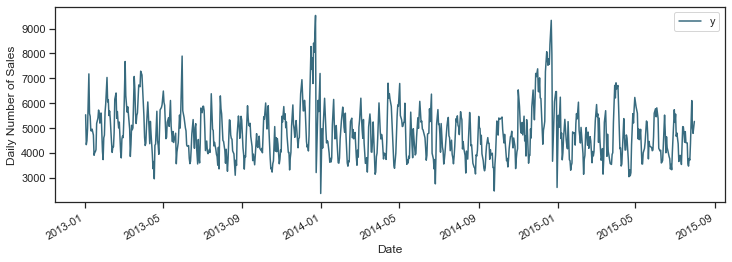

In [50]:
# plot daily sales
ax = sales.set_index('ds').plot(figsize = (12, 4), color = c)
ax.set_ylabel('Daily Number of Sales')
ax.set_xlabel('Date')
plt.show()

### Modeling Holidays

Prophet also allows to [model for holidays](https://facebookincubator.github.io/prophet/docs/holiday_effects.html), and that's what we do here.

The StateHoliday variable in the dataset indicates a state holiday, at which all stores are normally closed. There are also school holidays in the dataset at which ceratin stores are also closing their doors.

In [51]:
# create holidays dataframe
state_dates = df[(df.StateHoliday == 'a') | (df.StateHoliday == 'b') & (df.StateHoliday == 'c')].loc[:, 'Date'].values
school_dates = df[df.SchoolHoliday == 1].loc[:, 'Date'].values

state = pd.DataFrame({'holiday': 'state_holiday',
                      'ds': pd.to_datetime(state_dates)})
school = pd.DataFrame({'holiday': 'school_holiday',
                      'ds': pd.to_datetime(school_dates)})

holidays = pd.concat((state, school))      
holidays.head()

,holiday,ds
0,state_holiday,2015-06-04
1,state_holiday,2015-06-04
2,state_holiday,2015-06-04
3,state_holiday,2015-06-04
4,state_holiday,2015-06-04


In [53]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width = 0.95, 
                   holidays = holidays,daily_seasonality=True)
my_model.fit(sales)

# dataframe that extends into future 6 weeks 
future_dates = my_model.make_future_dataframe(periods = 6*7)

print("First week to forecast.")
future_dates.tail(7)

First week to forecast.


,ds
816,2015-09-05
817,2015-09-06
818,2015-09-07
819,2015-09-08
820,2015-09-09
821,2015-09-10
822,2015-09-11


First week to forecast.

In [55]:
# predictions
forecast = my_model.predict(future_dates)

# preditions for last week
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
816,2015-09-05,4106.855035,2523.664981,5798.510186
817,2015-09-06,3846.987855,2240.109857,5469.594361
818,2015-09-07,4177.423331,2396.902599,5951.773718
819,2015-09-08,3679.852972,1856.816502,5230.728317
820,2015-09-09,3566.108430,1840.231539,5243.147093
821,2015-09-10,3478.233240,1835.746041,5136.956773
822,2015-09-11,3733.548288,2214.629079,5384.219938


The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [56]:
fc = forecast[['ds', 'yhat']].rename(columns = {'Date': 'ds', 'Forecast': 'yhat'})

Prophet plots the observed values of our time series (the black dots), the forecasted values (blue line) and the uncertainty intervals of our forecasts (the blue shaded regions).

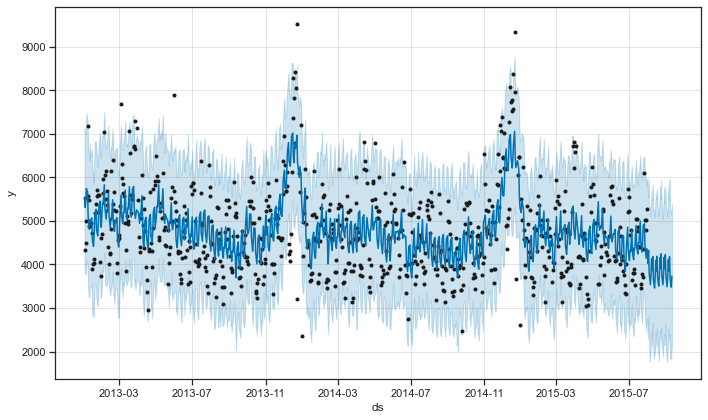

In [57]:
# visualizing predicions
my_model.plot(forecast);

As we see Prophet catches the trends and most of the time gets future values right.

One other particularly strong feature of Prophet is its ability to return the components of our forecasts. This can help reveal how daily, weekly and yearly patterns of the time series plus manyally included holidayes contribute to the overall forecasted values:

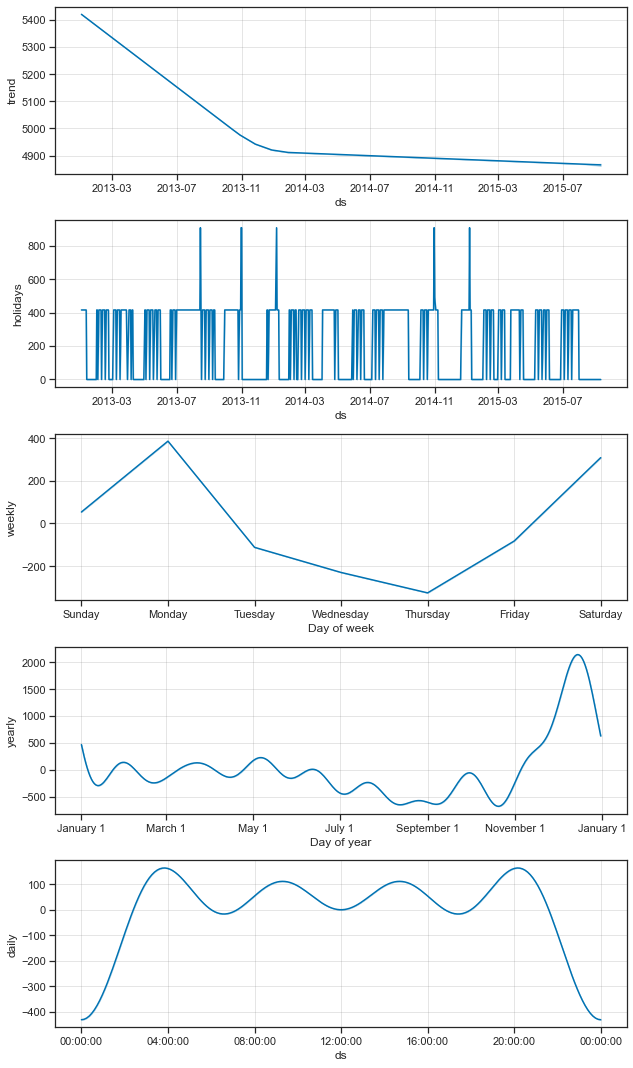

In [58]:
my_model.plot_components(forecast);

The first plot shows that the monthly sales of store number 1 has been linearly decreasing over time and the second shows the holiays gaps included in the model. The third plot highlights the fact that the weekly volume of last week sales peaks towards the Monday of the next week, while the forth plot shows that the most buzy season occurs during the Christmas holidays.

## Regression XGBoost

[XGBoost](https://github.com/dmlc/xgboost/blob/master/doc/model.md) is an implementation of Gradient Boosted Decision trees designed for speed and performance. Its more suitable name is a as [regularized Gradient Boosting](http://datascience.la/xgboost-workshop-and-meetup-talk-with-tianqi-chen/), as it uses a more regularized model formalization to control over-fitting.

Additional advantages of this algorythm are:
- Automated missing values handling: XGB uses a "learned" default direction for the missing values. "Learned" means learned in the tree construction process by choosing the best direction that optimizes the training loss.
- Interactive feature analysis (yet implemented only in R): plots the structure of decision trees with splits and leaves.
- Feature importance analysis: a sorted barplot of the most significant variables.

<div class = "alert alert-block alert-info"> As we already saw in the previos section our data is higly seasonal and not random (dependent). Therefore, before fitting any models we need to "smooth" target variable Sales. The typical preprocessing step is to log transform the data in question. Once we perform the forecasting we will unwind log transformations in reverse order. </div>

## Quick Run through

In [64]:
# to predict to
test = pd.read_csv("Data/test.csv", 
                    parse_dates = True, low_memory = False, index_col = 'Date')
test.head()

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,
2015-09-17,1,1,4,1.0,1,0,0
2015-09-17,2,3,4,1.0,1,0,0
2015-09-17,3,7,4,1.0,1,0,0
2015-09-17,4,8,4,1.0,1,0,0
2015-09-17,5,9,4,1.0,1,0,0


The Id variable represents a (Store, Date) duple within the test set.

In [65]:
# test: missing values?
test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [66]:
test[pd.isnull(test.Open)]

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,
2015-09-17,480,622,4,NaN,1,0,0
2015-09-16,1336,622,3,NaN,1,0,0
2015-09-15,2192,622,2,NaN,1,0,0
2015-09-14,3048,622,1,NaN,1,0,0
2015-09-12,4760,622,6,NaN,0,0,0
2015-09-11,5616,622,5,NaN,0,0,0
2015-09-10,6472,622,4,NaN,0,0,0
2015-09-09,7328,622,3,NaN,0,0,0
2015-09-08,8184,622,2,NaN,0,0,0


We see that these stores should be normally opened. Let's assume that they are then.

In [67]:
# replace NA's in Open variable by 1 
test.fillna(1, inplace = True)

### Data Encoding

XGBoost doesn't support anything else than numbers. So prior to modeling we need to encode certain factor variables into numerical plus extract dates as we did before for the train set.

In [68]:
# data extraction
test['Year'] = test.index.year
test['Month'] = test.index.month
test['Day'] = test.index.day
test['WeekOfYear'] = test.index.weekofyear

# to numerical
mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
test.StateHoliday.replace(mappings, inplace = True)

train_store.Assortment.replace(mappings, inplace = True)
train_store.StoreType.replace(mappings, inplace = True)
train_store.StateHoliday.replace(mappings, inplace = True)
train_store.drop('PromoInterval', axis = 1, inplace = True)

store.StoreType.replace(mappings, inplace = True)
store.Assortment.replace(mappings, inplace = True)
store.drop('PromoInterval', axis = 1, inplace = True)

Returning back to the train_store data:

In [69]:
# take a look on the train and store again
train_store.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,CompetitionOpen,PromoOpen
0,1,5,5263,555,1,1,0,1,2015,7,...,3,1,1270.0,9.0,2008.0,0,0.0,0.0,82.0,24187.75
1,1,4,5020,546,1,1,0,1,2015,7,...,3,1,1270.0,9.0,2008.0,0,0.0,0.0,82.0,24187.75
2,1,3,4782,523,1,1,0,1,2015,7,...,3,1,1270.0,9.0,2008.0,0,0.0,0.0,82.0,24187.75
3,1,2,5011,560,1,1,0,1,2015,7,...,3,1,1270.0,9.0,2008.0,0,0.0,0.0,82.0,24187.75
4,1,1,6102,612,1,1,0,1,2015,7,...,3,1,1270.0,9.0,2008.0,0,0.0,0.0,82.0,24187.75


Let's merge test and store data too:

In [71]:
print("Joining test set with an additional store information.")
test_store = pd.merge(test, store, how = 'inner', on = 'Store')

test_store['CompetitionOpen'] = 12 * (test_store.Year - test_store.CompetitionOpenSinceYear) + (test_store.Month - test_store.CompetitionOpenSinceMonth)
test_store['PromoOpen'] = 12 * (test_store.Year - test_store.Promo2SinceYear) + (test_store.WeekOfYear - test_store.Promo2SinceWeek) / 4.0

print("In total: ", test_store.shape)
test_store.head()

Joining test set with an additional store information.
In total:  (41088, 21)


,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,...,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,CompetitionOpen,PromoOpen
0,1,1,4,1.0,1,0,0,2015,9,17,...,3,1,1270.0,9.0,2008.0,0,0.0,0.0,84.0,24189.50
1,857,1,3,1.0,1,0,0,2015,9,16,...,3,1,1270.0,9.0,2008.0,0,0.0,0.0,84.0,24189.50
2,1713,1,2,1.0,1,0,0,2015,9,15,...,3,1,1270.0,9.0,2008.0,0,0.0,0.0,84.0,24189.50
3,2569,1,1,1.0,1,0,0,2015,9,14,...,3,1,1270.0,9.0,2008.0,0,0.0,0.0,84.0,24189.50
4,3425,1,7,0.0,0,0,0,2015,9,13,...,3,1,1270.0,9.0,2008.0,0,0.0,0.0,84.0,24189.25


### Model Training

**Approach**

1. Split train data to train and test set to evaluate the model.
2. Set eta to a relatively high value (e.g. 0.05 ~ 0.1), num_round to 300 ~ 500
3. Use grid search to find the best combination of additional parameters.
4. Lower eta until we reach the optimum.
5. Use the validation set as watchlist to retrain the model with the best parameters.

In [72]:
# split into training and evaluation sets
# excluding Sales and Id columns
predictors = [x for x in train_store.columns if x not in ['Customers', 'Sales', 'SalePerCustomer']]
y = np.log(train_store.Sales) # log transformation of Sales
X = train_store

# split the data into train/test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, # 30% for the evaluation set
                                                    random_state = 42)

In [73]:
# predictors
X.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear',
       'SalePerCustomer', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'CompetitionOpen', 'PromoOpen'],
      dtype='object')

In [74]:
# evaluation metric: rmspe
# Root Mean Square Percentage Error
# code chunk shared at Kaggle

def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat / y-1) ** 2))

def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y, yhat)

**Tuning Parameters** 

- eta: Step size used in updating weights. Lower value means slower training but better convergence.
- num_round: Total number of iterations.
- subsample: The ratio of training data used in each iteration; combat overfitting. Should be configured in the range of 30% to 80% of the training dataset, and compared to a value of 100% for no sampling.
- colsample_bytree: The ratio of features used in each iteration, default 1.
- max_depth: The maximum depth of each tree. If we do not limit max depth, gradient boosting would eventually overfit.
- early_stopping_rounds: If there's no increase in validation score for a given number of iterations, the algorithm will stop early, also combats overfitting.

In [80]:
# base parameters
params = {
    'booster': 'gbtree', 
    'objective': 'reg:squarederror', # regression task
    'subsample': 0.8, # 80% of data to grow trees and prevent overfitting
    'colsample_bytree': 0.85, # 85% of features used
    'eta': 0.1, 
    'max_depth': 10, 
    'seed': 42} # for reproducible results

In [83]:
# XGB with xgboost library
dtrain = xgb.DMatrix(X_train[predictors], y_train)
dtest = xgb.DMatrix(X_test[predictors], y_test)

watchlist = [(dtrain, 'train'), (dtest, 'test')]

xgb_model = xgb.train(params, dtrain, 300, evals = watchlist,
                      early_stopping_rounds = 50, feval = rmspe_xg, verbose_eval = True)

[0]	train-rmse:7.44337	test-rmse:7.44305	train-rmspe:0.99953	test-rmspe:0.99953
Multiple eval metrics have been passed: 'test-rmspe' will be used for early stopping.

Will train until test-rmspe hasn't improved in 50 rounds.
[1]	train-rmse:6.70078	test-rmse:6.70047	train-rmspe:0.99882	test-rmspe:0.99882
[2]	train-rmse:6.03255	test-rmse:6.03223	train-rmspe:0.99755	test-rmspe:0.99755
[3]	train-rmse:5.43137	test-rmse:5.43102	train-rmspe:0.99541	test-rmspe:0.99541
[4]	train-rmse:4.89035	test-rmse:4.89000	train-rmspe:0.99202	test-rmspe:0.99202
[5]	train-rmse:4.40370	test-rmse:4.40337	train-rmspe:0.98694	test-rmspe:0.98694
[6]	train-rmse:3.96569	test-rmse:3.96535	train-rmspe:0.97973	test-rmspe:0.97974
[7]	train-rmse:3.57178	test-rmse:3.57141	train-rmspe:0.96993	test-rmspe:0.96993
[8]	train-rmse:3.21749	test-rmse:3.21710	train-rmspe:0.95716	test-rmspe:0.95715
[9]	train-rmse:2.89886	test-rmse:2.89845	train-rmspe:0.94114	test-rmspe:0.94111
[10]	train-rmse:2.61224	test-rmse:2.61180	train-rmspe:0

[100]	train-rmse:0.14221	test-rmse:0.14570	train-rmspe:0.19803	test-rmspe:0.15916
[101]	train-rmse:0.14185	test-rmse:0.14540	train-rmspe:0.19697	test-rmspe:0.15884
[102]	train-rmse:0.14090	test-rmse:0.14447	train-rmspe:0.19611	test-rmspe:0.15774
[103]	train-rmse:0.13974	test-rmse:0.14337	train-rmspe:0.19517	test-rmspe:0.15661
[104]	train-rmse:0.13906	test-rmse:0.14273	train-rmspe:0.19461	test-rmspe:0.15590
[105]	train-rmse:0.13854	test-rmse:0.14223	train-rmspe:0.19407	test-rmspe:0.15537
[106]	train-rmse:0.13740	test-rmse:0.14113	train-rmspe:0.19314	test-rmspe:0.15424
[107]	train-rmse:0.13661	test-rmse:0.14038	train-rmspe:0.19250	test-rmspe:0.15348
[108]	train-rmse:0.13631	test-rmse:0.14012	train-rmspe:0.19222	test-rmspe:0.15322
[109]	train-rmse:0.13608	test-rmse:0.13991	train-rmspe:0.18826	test-rmspe:0.15301
[110]	train-rmse:0.13592	test-rmse:0.13976	train-rmspe:0.18805	test-rmspe:0.15286
[111]	train-rmse:0.13519	test-rmse:0.13908	train-rmspe:0.18749	test-rmspe:0.15218
[112]	train-rmse

[200]	train-rmse:0.10386	test-rmse:0.11109	train-rmspe:0.13124	test-rmspe:0.12247
[201]	train-rmse:0.10368	test-rmse:0.11096	train-rmspe:0.13104	test-rmspe:0.12232
[202]	train-rmse:0.10342	test-rmse:0.11073	train-rmspe:0.13083	test-rmspe:0.12209
[203]	train-rmse:0.10326	test-rmse:0.11061	train-rmspe:0.13067	test-rmspe:0.12196
[204]	train-rmse:0.10305	test-rmse:0.11043	train-rmspe:0.13048	test-rmspe:0.12179
[205]	train-rmse:0.10290	test-rmse:0.11031	train-rmspe:0.13032	test-rmspe:0.12166
[206]	train-rmse:0.10246	test-rmse:0.10992	train-rmspe:0.12993	test-rmspe:0.12125
[207]	train-rmse:0.10217	test-rmse:0.10966	train-rmspe:0.12967	test-rmspe:0.12099
[208]	train-rmse:0.10207	test-rmse:0.10961	train-rmspe:0.12957	test-rmspe:0.12093
[209]	train-rmse:0.10166	test-rmse:0.10925	train-rmspe:0.12919	test-rmspe:0.12055
[210]	train-rmse:0.10149	test-rmse:0.10910	train-rmspe:0.12905	test-rmspe:0.12040
[211]	train-rmse:0.10121	test-rmse:0.10884	train-rmspe:0.12879	test-rmspe:0.12013
[212]	train-rmse

Essentially, we want the least value. The model with base hyperparameters gives out better result on the train set, indicating to the overfitting issue.

### Grid Search from sklearn

Scikit learn wrapper is famous for the GridSearchCV and RandomizedSearchCV. Between these two, most of the time the preference leans towards RandomnizedSearchCV, faster version of GridSearchCV.

As an input, RandomnizedSearchCV takes only sklearn wrapper of XGboost, so instead of using the first version of a model, we build the analogous model in sklearn with XGBRegressor.

In [125]:
# XGB with sklearn wrapper
# the same parameters as for xgboost model
params_sk = {'max_depth': 10, 
            'n_estimators': 100, # the same as num_rounds in xgboost
            'objective': 'reg:squarederror', 
            'subsample': 0.8, 
            'colsample_bytree': 0.85, 
            'learning_rate': 0.1, 
            'seed': 42}     

skrg = XGBRegressor(**params_sk)

skrg.fit(X_train, y_train,eval_set=[(X_train, y_train), 
                    (X_test, y_test)])

[0]	validation_0-rmse:7.44181	validation_1-rmse:7.44151
[1]	validation_0-rmse:6.69779	validation_1-rmse:6.69749
[2]	validation_0-rmse:6.02804	validation_1-rmse:6.02779
[3]	validation_0-rmse:5.42528	validation_1-rmse:5.42505
[4]	validation_0-rmse:4.88279	validation_1-rmse:4.88256
[5]	validation_0-rmse:4.39454	validation_1-rmse:4.39434
[6]	validation_0-rmse:3.95512	validation_1-rmse:3.95494
[7]	validation_0-rmse:3.55970	validation_1-rmse:3.55954
[8]	validation_0-rmse:3.20376	validation_1-rmse:3.20361
[9]	validation_0-rmse:2.88346	validation_1-rmse:2.88333
[10]	validation_0-rmse:2.59514	validation_1-rmse:2.59503
[11]	validation_0-rmse:2.33569	validation_1-rmse:2.33559
[12]	validation_0-rmse:2.10214	validation_1-rmse:2.10205
[13]	validation_0-rmse:1.89195	validation_1-rmse:1.89186
[14]	validation_0-rmse:1.70277	validation_1-rmse:1.70270
[15]	validation_0-rmse:1.53251	validation_1-rmse:1.53245
[16]	validation_0-rmse:1.37928	validation_1-rmse:1.37922
[17]	validation_0-rmse:1.24137	validation

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.85, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
             subsample=0.8, tree_method='exact', validate_parameters=1,
             verbosity=None)

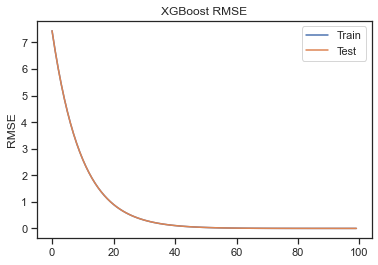

In [126]:
# retrieve performance metrics
results = skrg.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)
# plot AUC
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
plt.ylabel('RMSE')
plt.title('XGBoost RMSE')
plt.show()

For parameters we will specify the regularization parameter reg_alpha which reduce model complexity and enhance performance, as well as gamma parameter which represents the minimum loss reduction required to make a split and also max_depth used to control over-fitting.

In [128]:
# import scipy.stats as st
params_grid = {  
    'learning_rate': [0.04, 0.05],
    'max_depth': [14,16],
    'gamma': [0.8,1],
    'reg_alpha': [22,23]
}

search_sk = RandomizedSearchCV(skrg, params_grid, cv = 2) # 5 fold cross validation
search_sk.fit(X_train, y_train)

# best parameters
print(search_sk.best_params_); print(search_sk.best_score_)

{'reg_alpha': 22, 'max_depth': 14, 'learning_rate': 0.05, 'gamma': 0.8}
0.9853844505997529


In [131]:
# with new parameters
params_new = {
    'booster': 'gbtree', 
    'objective': 'reg:squarederror', 
    'subsample': 0.8, 
    'colsample_bytree': 0.85, 
    'eta': 0.05, 
    'max_depth': 14, 
    'gamma': 0.8,
    'reg_alpha': 22,
    'seed': 42} 

model_final = xgb.train(params_new, dtrain, 100, evals = watchlist,
                        early_stopping_rounds = 50, feval = rmspe_xg, verbose_eval = True)

[0]	train-rmse:7.85608	test-rmse:7.85577	train-rmspe:0.99974	test-rmspe:0.99974
Multiple eval metrics have been passed: 'test-rmspe' will be used for early stopping.

Will train until test-rmspe hasn't improved in 50 rounds.
[1]	train-rmse:7.46422	test-rmse:7.46390	train-rmspe:0.99954	test-rmspe:0.99954
[2]	train-rmse:7.09199	test-rmse:7.09164	train-rmspe:0.99925	test-rmspe:0.99925
[3]	train-rmse:6.73844	test-rmse:6.73809	train-rmspe:0.99887	test-rmspe:0.99887
[4]	train-rmse:6.40257	test-rmse:6.40222	train-rmspe:0.99835	test-rmspe:0.99835
[5]	train-rmse:6.08361	test-rmse:6.08326	train-rmspe:0.99766	test-rmspe:0.99766
[6]	train-rmse:5.78058	test-rmse:5.78022	train-rmspe:0.99678	test-rmspe:0.99678
[7]	train-rmse:5.49279	test-rmse:5.49243	train-rmspe:0.99565	test-rmspe:0.99565
[8]	train-rmse:5.21942	test-rmse:5.21903	train-rmspe:0.99423	test-rmspe:0.99423
[9]	train-rmse:4.95979	test-rmse:4.95942	train-rmspe:0.99248	test-rmspe:0.99248
[10]	train-rmse:4.71326	test-rmse:4.71289	train-rmspe:0

In [132]:
yhat = model_final.predict(xgb.DMatrix(X_test[predictors]))
error = rmspe(X_test.Sales.values, np.exp(yhat))

print('First validation yelds RMSPE: {:.6f}'.format(error))

First validation yelds RMSPE: 0.220226


### Model understanding

Feature importance scores help us see which variables contributed the most to the score.

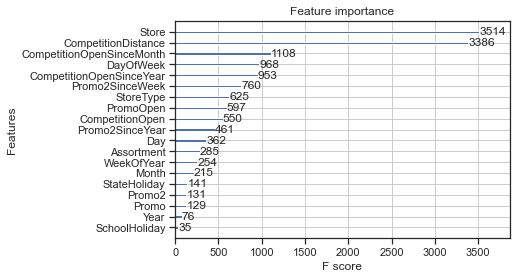

In [133]:
xgb.plot_importance(model_final)

Variables Store and CompetitionDistance are both leading. Then go features CompetitionOpenSinceMonth,  CompetitionOpenSinceYear, DayOfWeek, PromoSinceWeek and deducted features PromoOpen.

### Prediction to unseen data

In [134]:
# predictions to unseen data
unseen = xgb.DMatrix(test_store[predictors])
test_p = model_final.predict(unseen)

forecasts = pd.DataFrame({'Id': test['Id'], 
                          'Sales': np.exp(test_p)})
# forecasts
forecasts.head()

,Id,Sales
Date,,
2015-09-17,1,4620.380859
2015-09-17,2,4604.114746
2015-09-17,3,4953.741211
2015-09-17,4,5320.268066
2015-09-17,5,4703.836914


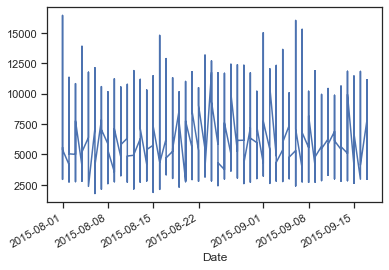

In [138]:
forecasts['Sales'].plot()

Concerning the XGboost model, recently Microsoft [open sourced LightGBM](https://github.com/Microsoft/LightGBM/tree/master/examples/python-guide), a potentially better library than XGboost.